<div style="position: relative; width: 100%; height: 300px; display: flex; justify-content: center; align-items: center;">
    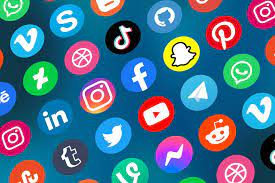
    <div style="border-radius: 10px; position: relative; z-index: 1; text-align: center; background-color: rgba(50, 50, 50, 0.5); color: rgb(255, 150, 150); display: flex; flex-direction: column; align-items: center; text-align: center; justify-content: center; width: 100%; margin: 10%; padding: 5px ">
            <h1 style="text-align: center; width: 100%" >Data Analytics - Social Media </h1>
    </div>
</div>

<h1 style="text-align: center; font-family: 'Roboto', sans-serif; color: rgb(230, 131, 131); background-color: rgba(146, 146, 255, 0.5); padding: 30px; border-style: solid; border-radius: 10px;"> Imports & Load Data </h1>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()
sns.set_palette('bwr')
SNS_CMAP = 'bwr'

colors = sns.palettes.color_palette(SNS_CMAP)

pd.options.mode.chained_assignment = None

In [4]:
# df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
df = pd.read_csv('Social_Network_Ads.csv')

<h1 style="text-align: center; font-family: 'Roboto', sans-serif; color: rgb(230, 131, 131); background-color: rgba(146, 146, 255, 0.5); padding: 30px; border-style: solid; border-radius: 10px;"> EDA </h1>

In [5]:
df.head().style.background_gradient(cmap=SNS_CMAP)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.describe().iloc[1:].style.background_gradient(cmap=SNS_CMAP)

,User ID,Age,EstimatedSalary,Purchased
mean,15691539.757500,37.655000,69742.500000,0.357500
std,71658.321581,10.482877,34096.960282,0.479864
min,15566689.000000,18.000000,15000.000000,0.000000
25%,15626763.750000,29.750000,43000.000000,0.000000
50%,15694341.500000,37.000000,70000.000000,0.000000
75%,15750363.000000,46.000000,88000.000000,1.000000
max,15815236.000000,60.000000,150000.000000,1.000000


In [7]:
agg_df = df.agg(["nunique", "unique", lambda x:x.isna().sum(), "dtypes"]).T
agg_df['unique'] = agg_df['unique'].apply(lambda x: x if len(x)<10 else x[:10])
agg_df.style.apply(lambda s: ['background-color: rgba(230, 131, 131, 0.5)' if i % 2 == 0 else 'background-color: rgba(146, 146, 255, 0.5)' for i in range(len(s))])

,nunique,unique,,dtypes
User ID,400,[15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311],0,int64
Gender,2,['Male' 'Female'],0,object
Age,43,[19 35 26 27 32 25 20 18 29 47],0,int64
EstimatedSalary,117,[ 19000 20000 43000 57000 76000 58000 84000 150000 33000 65000],0,int64
Purchased,2,[0 1],0,int64


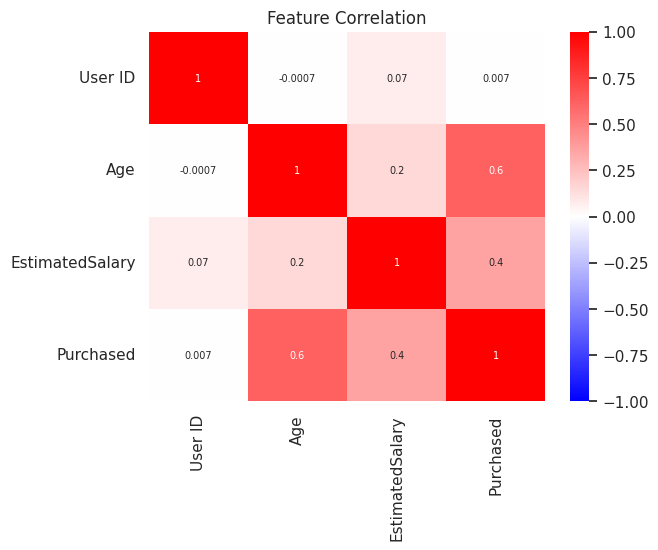

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
sns.heatmap(df.select_dtypes(include=numerics).corr(), cmap=SNS_CMAP, annot=True, annot_kws={'fontsize':7}, fmt='.1g', vmin=-1, vmax=1, center= 0)
plt.title("Feature Correlation")
plt.show()

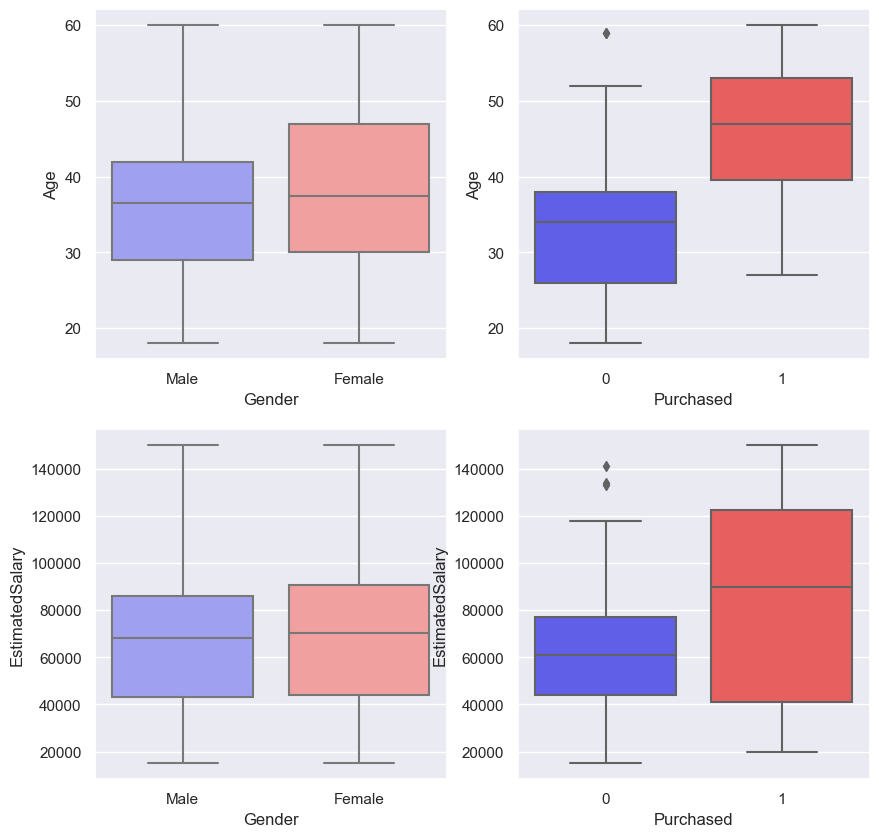

In [119]:
cols = df.columns.drop(['User ID', 'Purchased', 'Gender'])
accent1 = {0: colors[0], 1: colors[5]}
accent2 = {'Male': colors[1], 'Female': colors[4]}
n_cols = len(cols)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(cols):
    sns.boxplot(df[[col, 'Gender']], x='Gender', y=col, ax=axes[i, 0], palette=accent2)
    sns.boxplot(df[[col, 'Purchased']], x='Purchased', y=col, ax=axes[i, 1], palette=accent1)

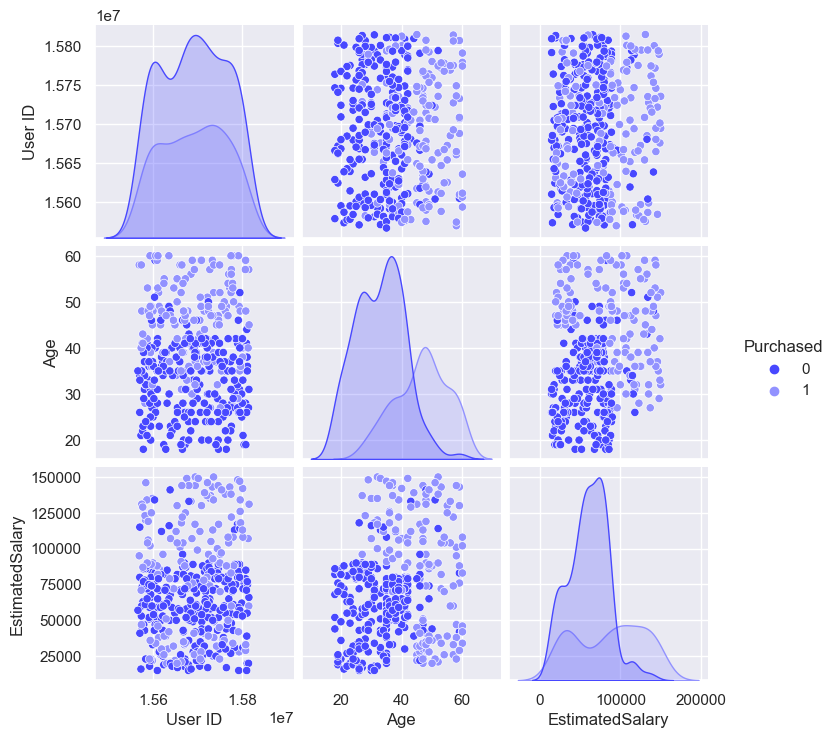

In [97]:
sns.pairplot(df, hue='Purchased')
plt.show()

<h1 style="text-align: center; font-family: 'Roboto', sans-serif; color: rgb(230, 131, 131); background-color: rgba(146, 146, 255, 0.5); padding: 30px; border-style: solid; border-radius: 10px;"> PreProcessing Pipeline </h1>

<h3 style="text-align: center; font-family: 'Roboto', sans-serif; color: rgba(146, 146, 255, 0.8); background-color: rgba(230, 131, 131, 0.3); padding: 10px; border-style: solid; border-radius: 10px;"> Pipeline </h3>

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [11]:
categorical_cols = ['Gender']
numeric_cols = ['Age', 'EstimatedSalary']
columns_to_drop = list(set(df.columns)-set(categorical_cols+numeric_cols)) #drop any cols in df we r not considering

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('column_dropper', 'drop', columns_to_drop),
        ('num', StandardScaler(), numeric_cols),  
        ('cat', OrdinalEncoder(), categorical_cols)  
    ])

In [13]:
preprocessor.fit(df)

ColumnTransformer(transformers=[('column_dropper', 'drop',
                                 ['User ID', 'Purchased']),
                                ('num', StandardScaler(),
                                 ['Age', 'EstimatedSalary']),
                                ('cat', OrdinalEncoder(), ['Gender'])])

In [14]:
X = preprocessor.transform(df)
Y = df['Purchased']
X.shape, Y.shape

((400, 3), (400,))

<h3 style="text-align: center; font-family: 'Roboto', sans-serif; color: rgba(146, 146, 255, 0.8); background-color: rgba(230, 131, 131, 0.3); padding: 10px; border-style: solid; border-radius: 10px;"> Train-Test Split </h3>

In [20]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)

<div style=" margin: 0% 20%; text-align: center; font-family: 'Roboto', sans-serif; color: rgba(146, 146, 230, 1); background-color: rgba(230, 131, 131, 0.15); padding: 20px; border-style: solid; border-radius: 10px;"> <p>Since training data is so limited, we will use Cross Validation instead of val set</p></div>

<h1 style="text-align: center; font-family: 'Roboto', sans-serif; color: rgb(230, 131, 131); background-color: rgba(146, 146, 255, 0.5); padding: 30px; border-style: solid; border-radius: 10px;"> Logistic Regression </h1>

<h3 style="text-align: center; font-family: 'Roboto', sans-serif; color: rgba(146, 146, 255, 0.8); background-color: rgba(230, 131, 131, 0.3); padding: 10px; border-style: solid; border-radius: 10px;"> Baseline Model </h3>

In [16]:
from sklearn.linear_model import LogisticRegressionCV
lr_classifier = LogisticRegressionCV()
lr_classifier.fit(x_train, y_train)

LogisticRegressionCV()

In [21]:
lr_classifier.score(x_test, y_test)

0.9

<h1 style="text-align: center; font-family: 'Roboto', sans-serif; color: rgb(230, 131, 131); background-color: rgba(146, 146, 255, 0.5); padding: 30px; border-style: solid; border-radius: 10px;"> Pipeline </h1>

In [18]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lr_classifier)
])

In [19]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('column_dropper', 'drop',
                                                  ['User ID', 'Purchased']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'EstimatedSalary']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Gender'])])),
                ('model', LogisticRegressionCV())])